<a href="https://colab.research.google.com/github/MukiiriKoome/TensorFlow/blob/master/BasicCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image classification using CNN with the CIFAR-10 Dataset

In [1]:
# Importing the required necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Loading and Pre-Processing of the CIFAR-10 Dataset
(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()

In [5]:
# Normalising pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [6]:
# Defining the class names for the CIFAR-10 dataset images
class_name = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

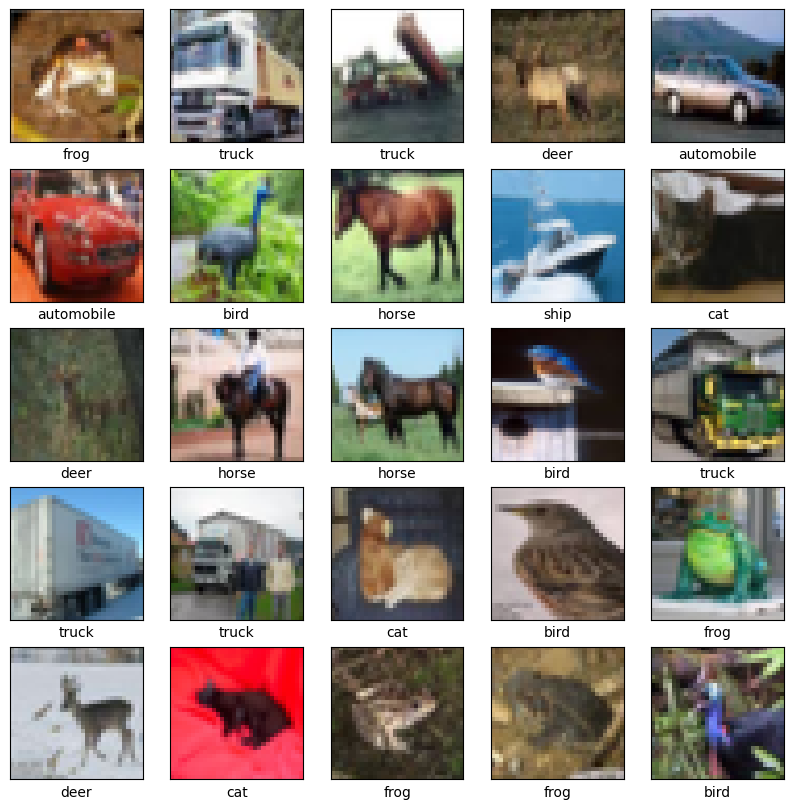

In [9]:
# Visualizing a few training images from the CIFAR-10 dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_name[train_labels[i][0]])
plt.show()

In [12]:
# Building the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Printing the model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compiling the CNN model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
# Training the CNN model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 48ms/step - accuracy: 0.3425 - loss: 1.7718 - val_accuracy: 0.5329 - val_loss: 1.2996
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.5640 - loss: 1.2159 - val_accuracy: 0.6004 - val_loss: 1.1309
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.6373 - loss: 1.0336 - val_accuracy: 0.6207 - val_loss: 1.0725
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.6679 - loss: 0.9425 - val_accuracy: 0.6666 - val_loss: 0.9577
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.7027 - loss: 0.8441 - val_accuracy: 0.6859 - val_loss: 0.9057
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 46ms/step - accuracy: 0.7225 - loss: 0.7926 - val_accuracy: 0.6923 - val_loss: 0.8819
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 44ms/step - accuracy: 0.7330 - loss: 0.7523 - val_accuracy: 0.6969 - val_loss: 0.8789
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 47ms/step - accuracy: 0.7514 -

In [22]:
# Evaluating the performance of the CNN model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\n The accuracy of the model is {test_acc}')

313/313 - 4s - 12ms/step - accuracy: 0.7062 - loss: 0.8631

 The accuracy of the model is 0.7062000036239624


Text(0.5, 1.0, 'Training and Validation Loss')

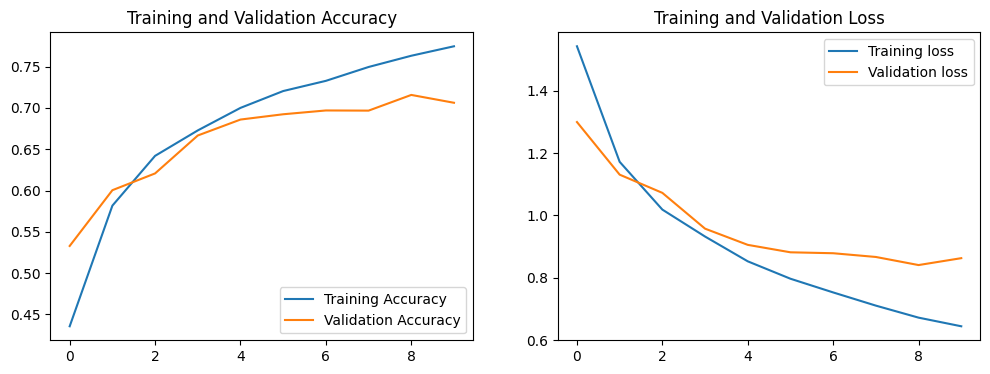

In [20]:
# Plotting the training and validation accuracy and loss values
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend(loc='upper right')
# plt.ylim([0,1.0])
plt.title('Training and Validation Loss')